## 15 Factors

factor을 공부하기 위해서, `forcats` 패키지를 사용할 것이다.  
이 패키지는 categorical value를 다룰 수 있는 tool을 제공한다.  

In [10]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.1.1       √ purrr   0.3.2  
√ tibble  2.1.1       √ dplyr   0.8.0.1
√ tidyr   0.8.3       √ stringr 1.4.0  
√ readr   1.3.1       √ forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### 15-1 Creating factors

month를 기록하는 variable이 있다고 하자. 

In [1]:
x1 <- c("Dec", "Apr", "Jan", "Mar")

이런 string 형식은 문제가 있는데 첫째 오타를 쳤을 때 이를 알 수 없으며, 둘째로 정렬이 별로다.  

In [3]:
x2 <- c("Dec", "Apr", "Jam", "Mar")

In [4]:
sort(x1)

[1] "Apr" "Dec" "Jan" "Mar"

이 두가지의 문제를 factor를 통해 고칠 수 있다.  
factor를 만들기 위해, 유효한 level을 만들 필요가 있다.  

In [5]:
month_levels <- c(
  "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
  "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
)

이제 factor를 만들 수 있다.  

In [6]:
y1 <- factor(x1, levels = month_levels)
y1

[1] Dec Apr Jan Mar
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

In [7]:
sort(y1)

[1] Jan Mar Apr Dec
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

set에 없는 아무 value는 `NA`로 바꿔진다. 

In [8]:
y2 <- factor(x2, levels = month_levels)
y2

[1] Dec  Apr  <NA> Mar 
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

만약 warning 문자를 쓰고 싶다면, `readr::parse_factor()`를 쓰면 된다.  

In [11]:
y2 <- parse_factor(x2, levels = month_levels)
y2

Warning message:
"1 parsing failure.
row col           expected actual
  3  -- value in level set    Jam
"

[1] Dec  Apr  <NA> Mar 
attr(,"problems")
# A tibble: 1 x 4
    row   col expected           actual
  <int> <int> <chr>              <chr> 
1     3    NA value in level set Jam   
Levels: Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec

만약 level를 빠트렸다면, level은 알파벳 순서로 된다.  

In [12]:
factor(x1)

[1] Dec Apr Jan Mar
Levels: Apr Dec Jan Mar

만약 data를 작성한 순서대로 level를 만들고 싶다면, level을 `unique(x)`으로 설정하거나, factor를 만들거나 `fct_inorder()`를 추가하면 된다. 

In [13]:
f1 <- factor(x1, levels = unique(x1))
f1

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

In [14]:
f2 <- x1 %>% factor() %>% fct_inorder()
f2

[1] Dec Apr Jan Mar
Levels: Dec Apr Jan Mar

level이 어떻게 설정되어있는지 궁금하다면, `levels()`를 통해 확인 가능하다.  

In [15]:
levels(f2)

[1] "Dec" "Apr" "Jan" "Mar"

### 15-2 General Social Survey

나머지 파트부터는 `forcats::gss_cat`를 사용하여 공부해보도록 하자.  

In [20]:
gss_cat

year,marital,age,race,rincome,partyid,relig,denom,tvhours
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA
2000,Never married,36,White,$25000 or more,Not str republican,Christian,Not applicable,3
2000,Divorced,44,White,$7000 to 7999,"Ind,near dem",Protestant,Lutheran-mo synod,NA
2000,Married,44,White,$25000 or more,Not str democrat,Protestant,Other,0
2000,Married,47,White,$25000 or more,Strong republican,Protestant,Southern baptist,3


만약 factor가 tibble에 저장되어 있다면, 그것의 level를 확인하기 쉽다.  
`count()`를 통하거나 box chart를 통해서 말이다.  

In [21]:
gss_cat %>%
  count(race)

race,n
Other,1959
Black,3129
White,16395


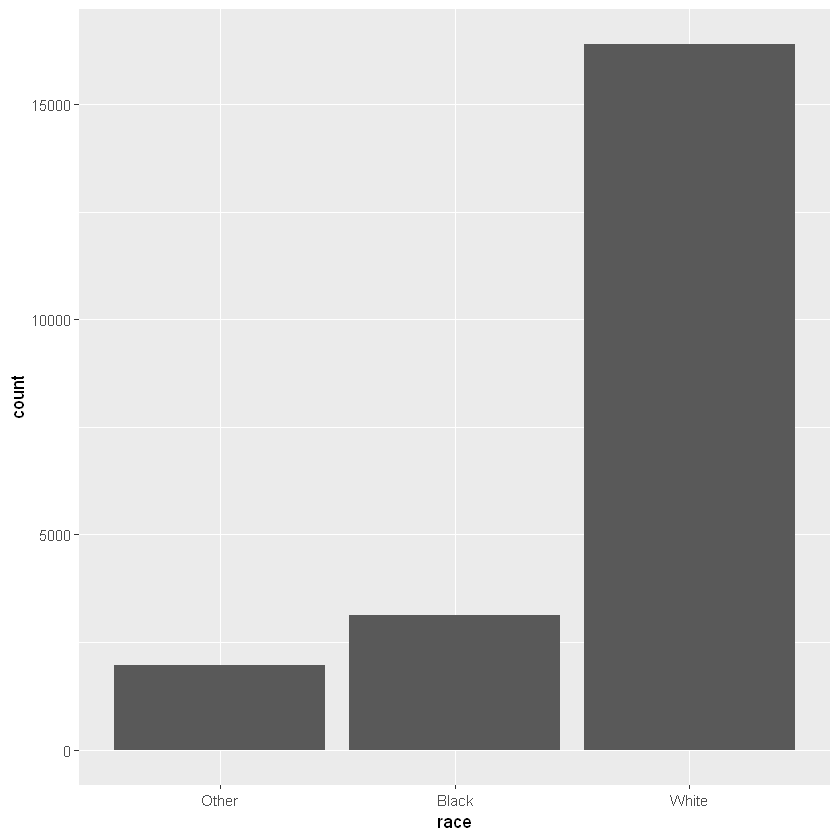

In [22]:
ggplot(gss_cat, aes(race)) +
  geom_bar()

default로 ggplot2는 아무 value을 갖지않는 level을 drop 시키기 때문에 이를 강제로 표현시킬 수 도 있다.  

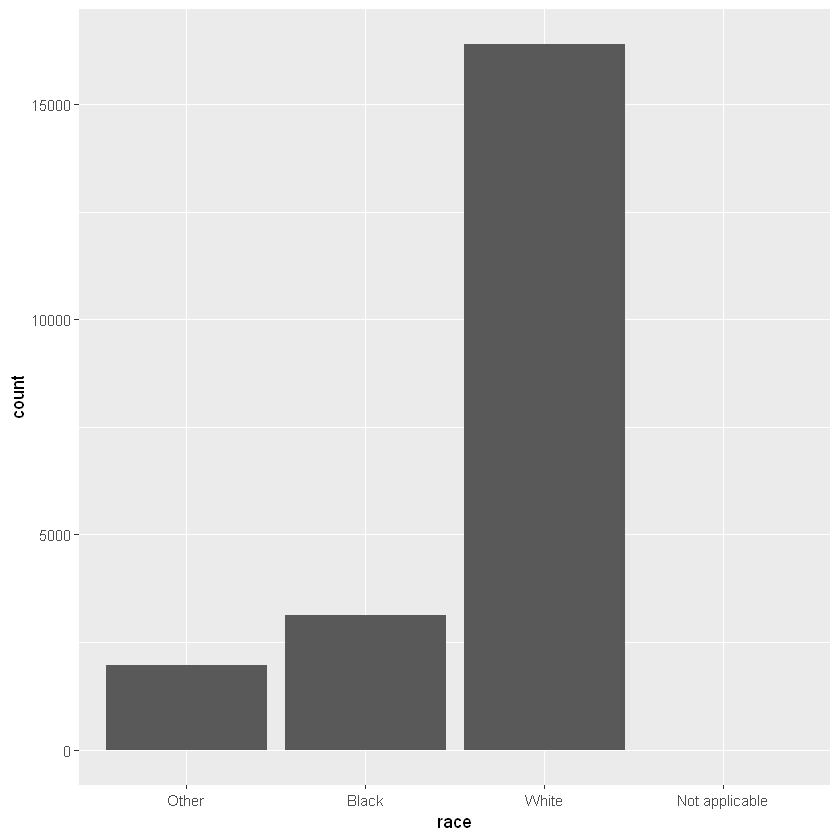

In [23]:
ggplot(gss_cat, aes(race)) +
  geom_bar() +
  scale_x_discrete(drop = FALSE)

levels이 다 유효한 value를 가진 것을 알 수 있다.  

### 15-3 Modifying factor order

visualization에서 factor level의 순서를 바꾸는 것이 유용할 때가 있다.  
예를 들어 종교에 따른 하루 TV 시청시간의 평균을 탐색하고 싶다고 가정하자.  

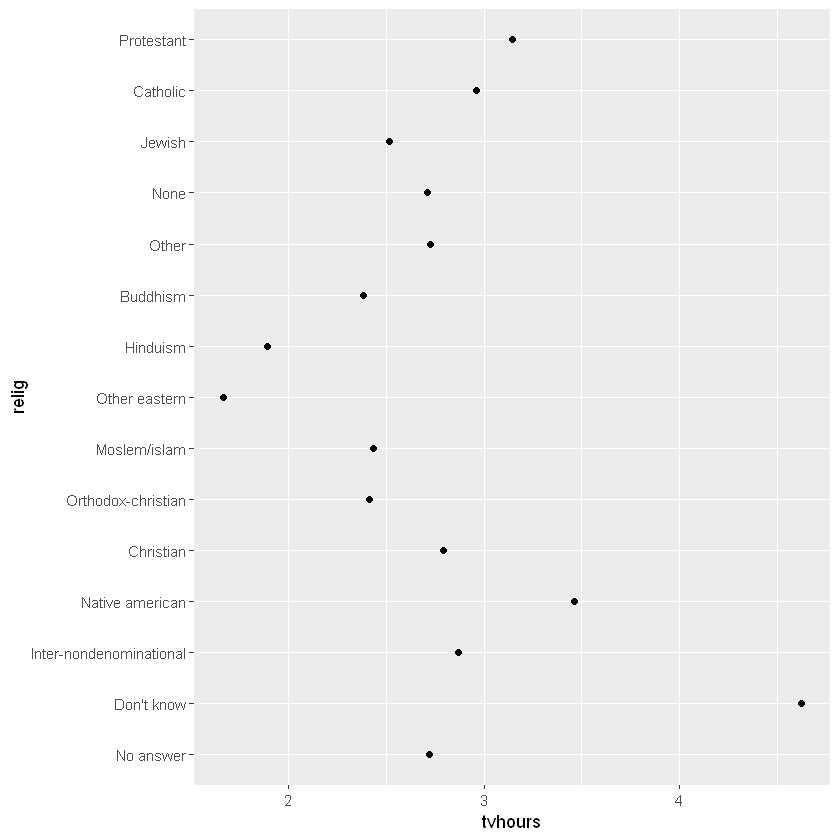

In [24]:
relig_summary <- gss_cat %>%
  group_by(relig) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  )

ggplot(relig_summary, aes(tvhours, relig)) + geom_point()

일정한 패턴이 없기 때문에, 이 plot를 해석하기 어렵다. `fct_reorder()`를 사용하여 `relig`의 level를 조절해보도록 하자.  

`fct_reorder()`은 세 가지 arguments를 가지고 있다.  

- `f`: level를 고치고 싶은 factor
- `x`: level를 reorder 하기 위한 numeric vector
-  `fun`: 선택적으로 f의 value에 대해 x의 value가 여러개 있을 때 쓰인다. defualt는 `median`이다.  

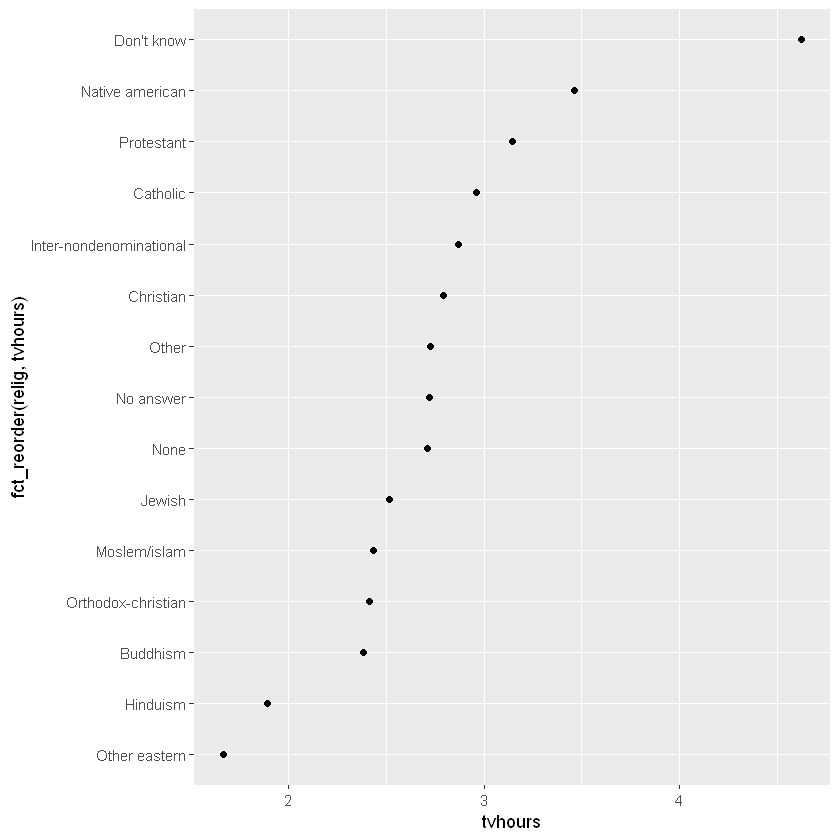

In [25]:
ggplot(relig_summary, aes(tvhours, fct_reorder(relig, tvhours))) +
  geom_point()

religion을 reorder 함으로써  “Don’t know” 사람들이 tv를 오래 보는것을 Hinduism & Other Eastern religions이 적게 보는 것을 쉽게 알 수 있다.  

transformation이 복잡해지기 시작하다면, `aes()`안에서 나와 `mutate()`에 쓰는 것을 추천한다.  
이 방식에 따라 위 코드를 다음과 같이 다시 쓸 수 있다.  

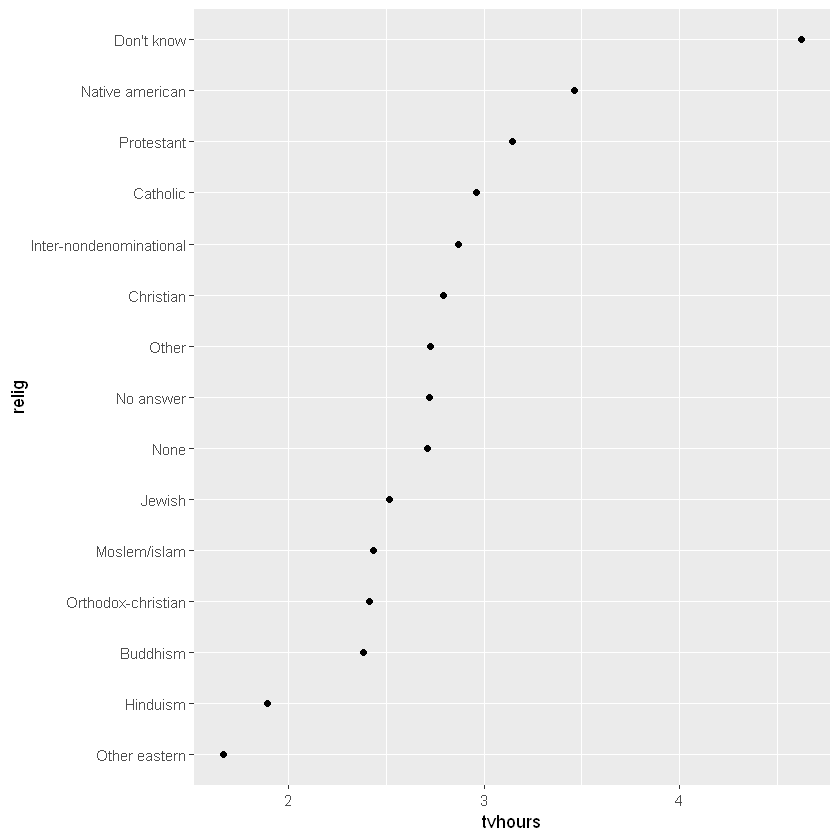

In [26]:
relig_summary %>%
  mutate(relig = fct_reorder(relig, tvhours)) %>%
  ggplot(aes(tvhours, relig)) +
    geom_point()

이번엔 income level 에 따라 average age가 어떻게 변화하는지를 보여주는 plot를 만들어보도록 하자.  

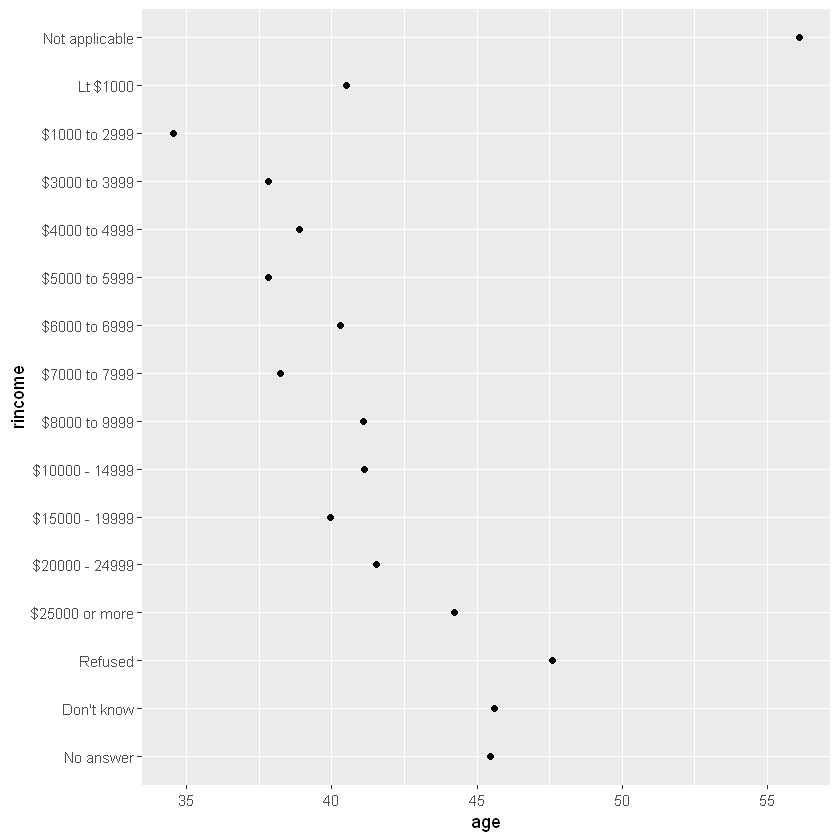

In [28]:

rincome_summary <- gss_cat %>%
  group_by(rincome) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  )

ggplot(rincome_summary, aes(age, rincome)) + geom_point()

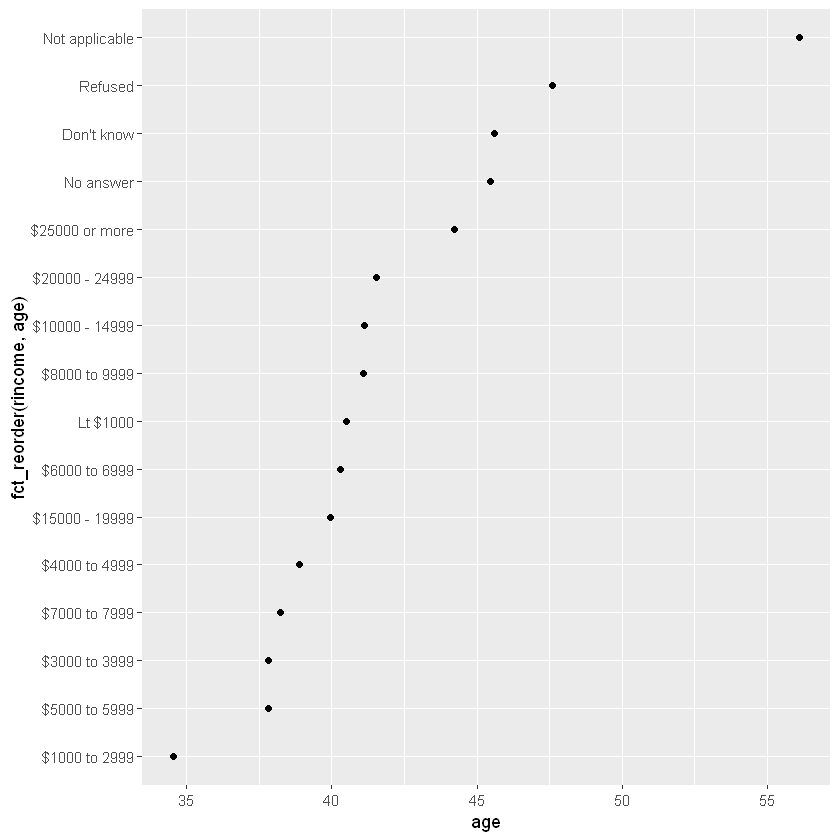

In [30]:
rincome_summary <- gss_cat %>%
  group_by(rincome) %>%
  summarise(
    age = mean(age, na.rm = TRUE),
    tvhours = mean(tvhours, na.rm = TRUE),
    n = n()
  )

ggplot(rincome_summary, aes(age, fct_reorder(rincome, age))) + geom_point()

아래처럼 level을 임의로 reorder하는 것은 그다지 좋은 생각이 아니다. rincome은 이미 원칙있게 정렬 되어있기에 건드리지 말아야 하기 때문이다.  

`fct_reorder()`은 임의적으로 정렬된 factor에 대해서만 써야 한다.  

한편, `Not applicable`를 앞으로 가져오는 법을 봐보자. 이를 위해 `fct_relevel()`를 사용해 보자.  

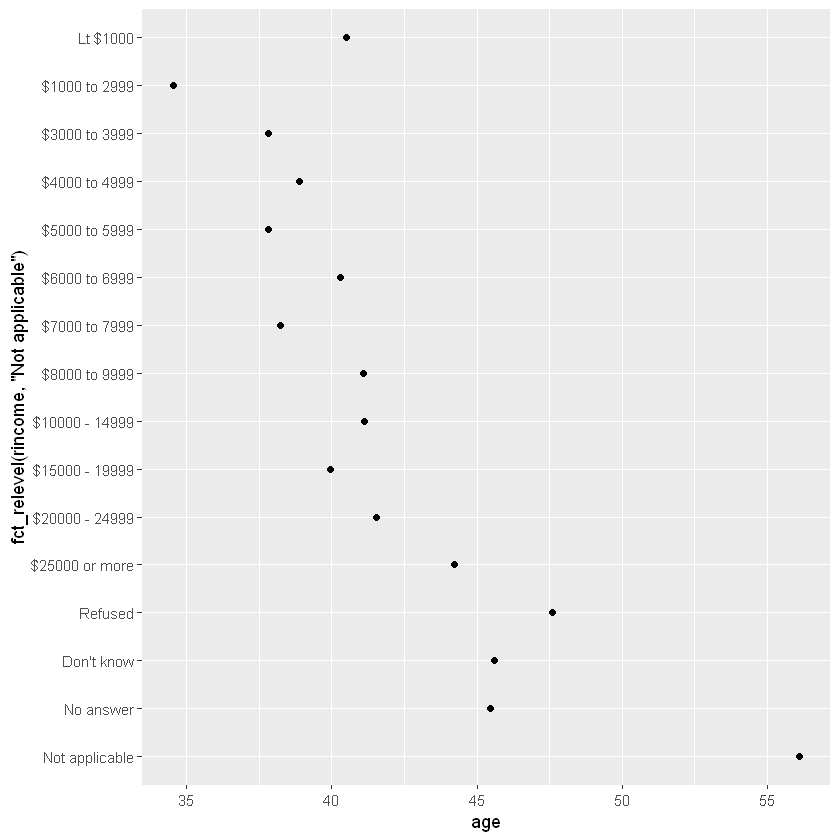

In [31]:
ggplot(rincome_summary, aes(age, fct_relevel(rincome, "Not applicable"))) +
  geom_point()

선에 색을 입힐 때 재정렬을 사용할 수도 있다. `fct_reorder2()`는 가장 큰 `x`값에 해당하는 `y`를 크기 순으로 reorder 해준다.  

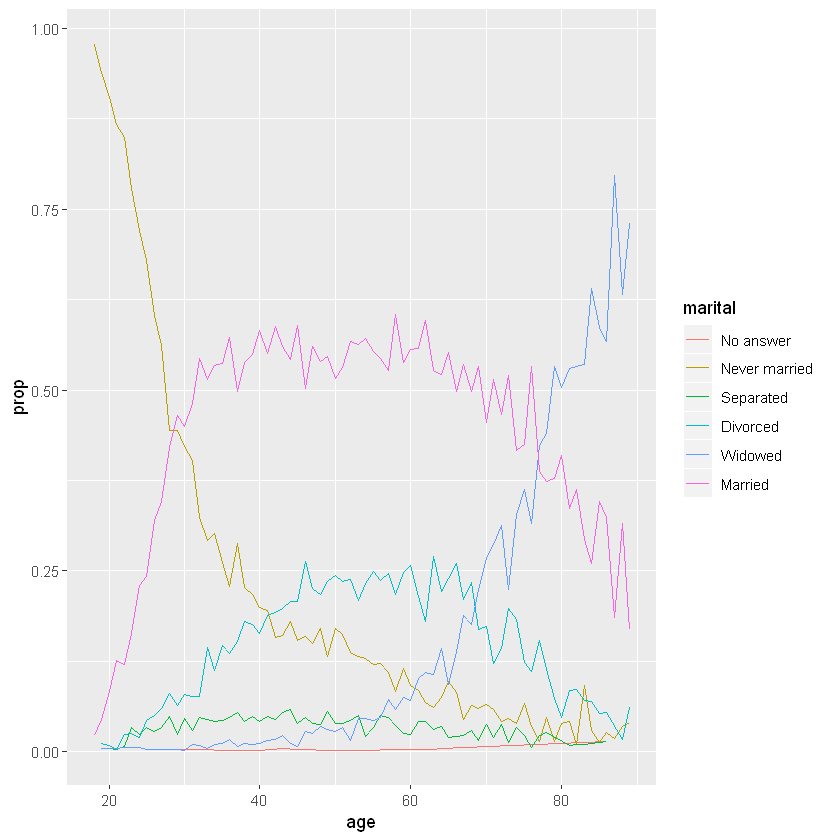

In [32]:
by_age <- gss_cat %>%
  filter(!is.na(age)) %>%
  count(age, marital) %>%
  group_by(age) %>%
  mutate(prop = n / sum(n))

ggplot(by_age, aes(age, prop, colour = marital)) +
  geom_line(na.rm = TRUE)

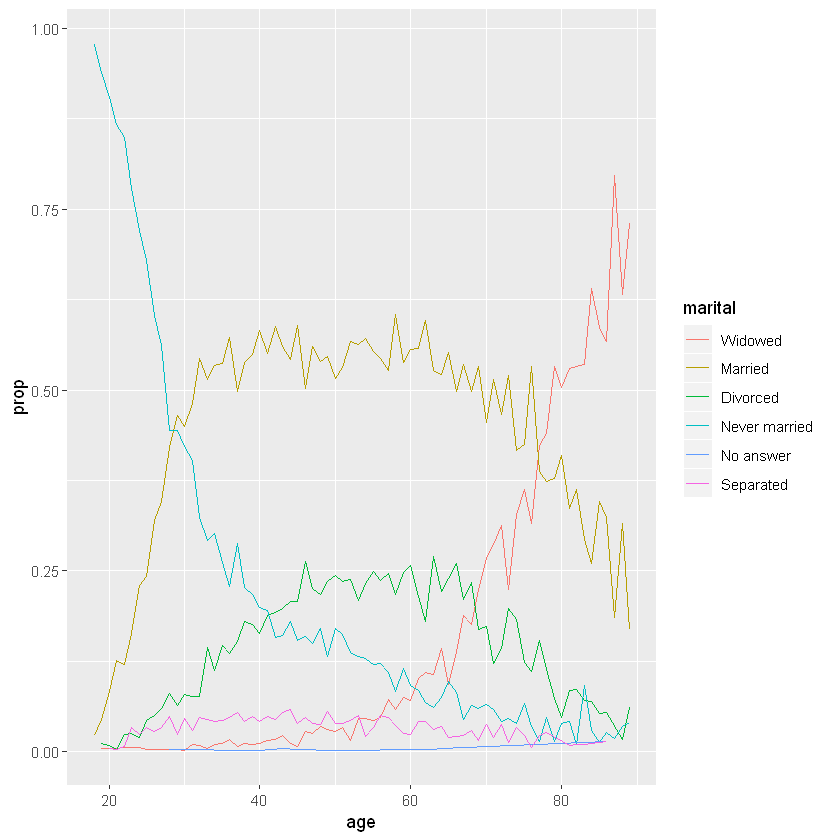

In [33]:
ggplot(by_age, aes(age, prop, colour = fct_reorder2(marital, age, prop))) +
  geom_line() +
  labs(colour = "marital")

마지막으로, `fct_infreq()` 를 사용하여 빈도 오름차순으로 레벨을 정렬할 수 있다. 이는 `fct_rev()` 와 조합하여 사용할 수도 있다.  
`fct_rev()`은 factor level를 reverse 하는 것이다.  

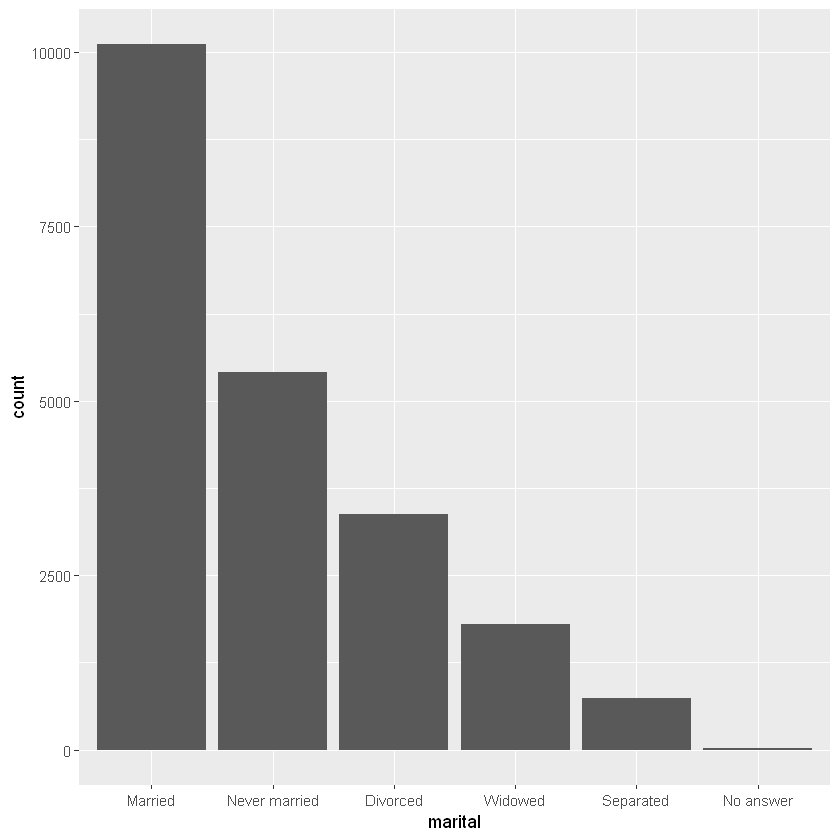

In [37]:
gss_cat %>%
  mutate(marital = marital %>% fct_infreq()) %>%
  ggplot(aes(marital)) +
    geom_bar()

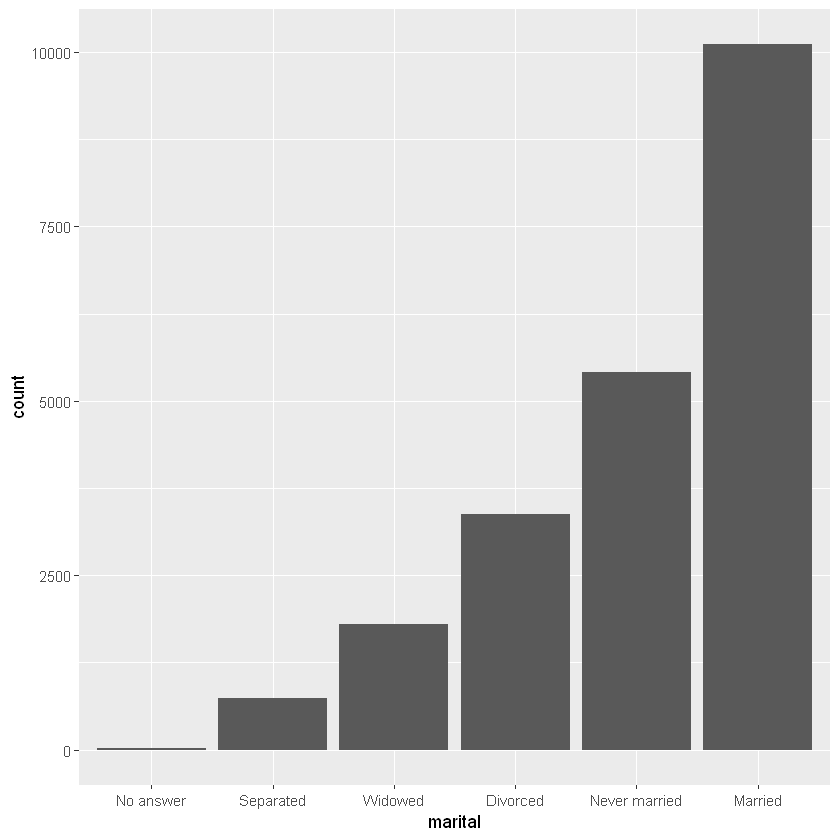

In [38]:
gss_cat %>%
  mutate(marital = marital %>% fct_infreq() %>% fct_rev()) %>%
  ggplot(aes(marital)) +
    geom_bar()

15-4 Modifying factor levels

이번에는 level의 value를 바꾸는 것을 해보도록 해보자.  
가장 일반적으로 사용되는 것은 `fct_recode()`이다.  
`gss_cat$partyid`를 통해 확인해보도록 하자.  

In [39]:
gss_cat %>% count(partyid)

partyid,n
No answer,154
Don't know,1
Other party,393
Strong republican,2314
Not str republican,3032
"Ind,near rep",1791
Independent,4119
"Ind,near dem",2499
Not str democrat,3690
Strong democrat,3490


level들이 짧고 일관성이 없다. 한 번 고쳐보도록 하자.  

In [40]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near rep" = "Ind,near rep",
    "Independent, near dem" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat"
  )) %>%
  count(partyid)

partyid,n
No answer,154
Don't know,1
Other party,393
"Republican, strong",2314
"Republican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690
"Democrat, strong",3490


group를 combine 하기 위해, 예전 level에 새로운 같은 level을 할당하면 된다.  

In [41]:
gss_cat %>%
  mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near rep" = "Ind,near rep",
    "Independent, near dem" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat",
    "Other"                 = "No answer",
    "Other"                 = "Don't know",
    "Other"                 = "Other party"
  )) %>%
  count(partyid)

partyid,n
Other,548
"Republican, strong",2314
"Republican, weak",3032
"Independent, near rep",1791
Independent,4119
"Independent, near dem",2499
"Democrat, weak",3690
"Democrat, strong",3490


다수의 level을 합치려면 `fct_collapse()`를 사용해 볼 수 있다.  

In [42]:
gss_cat %>%
  mutate(partyid = fct_collapse(partyid,
    other = c("No answer", "Don't know", "Other party"),
    rep = c("Strong republican", "Not str republican"),
    ind = c("Ind,near rep", "Independent", "Ind,near dem"),
    dem = c("Not str democrat", "Strong democrat")
  )) %>%
  count(partyid)

partyid,n
other,548
rep,5346
ind,8409
dem,7180


때로는 소규모 그룹을 하나로 묶고 싶을 때도 있을 것이다.  
`fct_lump`를 사용해 볼 수 있다.  
기본 동작은 묶은 그룹이 가장 작은 그룹이 되는 조건을 유지하면서 작은 그룹들을 계속 묶는다.  
(~~lump가 뭉텅이라는 뜻이다~~)

In [43]:
gss_cat %>%
  mutate(relig = fct_lump(relig)) %>%
  count(relig)

relig,n
Protestant,10846
Other,10637


여기서는 너무 과하게 묶였다. 이 대신 `n` parameter를 써서 지키고 싶은 group 수를 정할 수 있다.  

In [45]:
gss_cat %>%
  mutate(relig = fct_lump(relig, n = 10)) %>%
  count(relig, sort = TRUE) %>%
  print(n = Inf)

# A tibble: 10 x 2
   relig                       n
   <fct>                   <int>
 1 Protestant              10846
 2 Catholic                 5124
 3 None                     3523
 4 Christian                 689
 5 Other                     458
 6 Jewish                    388
 7 Buddhism                  147
 8 Inter-nondenominational   109
 9 Moslem/islam              104
10 Orthodox-christian         95


In [46]:
gss_cat %>%
  mutate(relig = fct_lump(relig, n = 10)) %>%
  count(relig, sort = TRUE)

relig,n
Protestant,10846
Catholic,5124
None,3523
Christian,689
Other,458
Jewish,388
Buddhism,147
Inter-nondenominational,109
Moslem/islam,104
Orthodox-christian,95
